In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [46]:
import statannotations

statannotations.__version__, sns.__version__

('0.6.0', '0.12.0')

In [47]:
plt.rcParams.update({'font.size': 20})
cmap = plt.get_cmap("tab10")
# cmap
cmap2 = plt.get_cmap("tab20b")
# cmap2

In [48]:
pairs = [("GRU", "dySTGNN"), ("LSTM", "dySTGNN"), ("TCN", "dySTGNN"),("Transformer", "dySTGNN")]

In [49]:
model = ['GRU']*10 + ['LSTM']*10 + ['TCN']*10 + ['Transformer']*10 + ['dySTGNN']*10

In [50]:
roc_l = [0.7000,0.7004,0.7010,0.7004,0.7025,0.7017,0.7003,0.6979,0.7074,0.7007,
         0.6708,0.6667,0.6787,0.6696,0.6677,0.6686,0.6704,0.6707,0.6699,0.6708,
         0.6909,0.6947,0.6941,0.6940,0.6962,0.6980,0.6922,0.6953,0.6958,0.6956,
         0.6957,0.7018,0.7000,0.7033,0.7007,0.7018,0.6992,0.6978,0.7019,0.7021,
         0.7495,0.7499,0.7517,0.7521,0.7505,0.7517,0.7499,0.7525,0.7526,0.7475]

pr_l = [0.5951,0.5920,0.5936,0.5920,0.5979,0.5948,0.5947,0.5916,0.5967,0.5940,
        0.5591,0.5541,0.5660,0.5565,0.5554,0.5546,0.5551,0.5591,0.5582,0.5596,
        0.5794,0.5854,0.5850,0.5869,0.5884,0.5916,0.5804,0.5897,0.5879,0.5839,
        0.5888,0.5975,0.5931,0.5983,0.5959,0.5981,0.5946,0.5925,0.5976,0.5967,
        0.6645,0.6639,0.6667,0.6670,0.6675,0.6715,0.6597,0.6687,0.6663,0.6590]

f1_l = [0.5132,0.4954,0.5027,0.4954,0.5129,0.5084,0.5054,0.4970,0.4994,0.5125,
        0.4625,0.4706,0.4557,0.4601,0.4555,0.4646,0.4605,0.4803,0.4561,0.4583,
        0.4989,0.5166,0.4838,0.4999,0.4880,0.5079,0.5037,0.4999,0.5050,0.4951,
        0.4996,0.4813,0.5052,0.5098,0.4904,0.4901,0.5026,0.5035,0.4953,0.5044,
        0.5994,0.5958,0.5893,0.6111,0.5900,0.6041,0.6037,0.6080,0.6102,0.5993]

In [51]:
df_roc = pd.DataFrame({'Model': model, 'AUC ROC': roc_l})
df_pr  = pd.DataFrame({'Model': model, 'AUC PR': pr_l})
df_f1  = pd.DataFrame({'Model': model, 'F1 Score': f1_l})

In [52]:
my_pal = {"GRU": cmap.colors[0], "LSTM": cmap.colors[1],"TCN": cmap.colors[2],"Transformer": cmap.colors[3],"dySTGNN": cmap.colors[4]}

hue_plot_params_aucroc = {'data': df_roc,'x': 'Model','y': 'AUC ROC',"palette": my_pal}
hue_plot_params_aucpr  = {'data': df_pr, 'x': 'Model','y': 'AUC PR', "palette": my_pal}
hue_plot_params_f1     = {'data': df_f1, 'x': 'Model','y': 'F1 Score',"palette": my_pal}

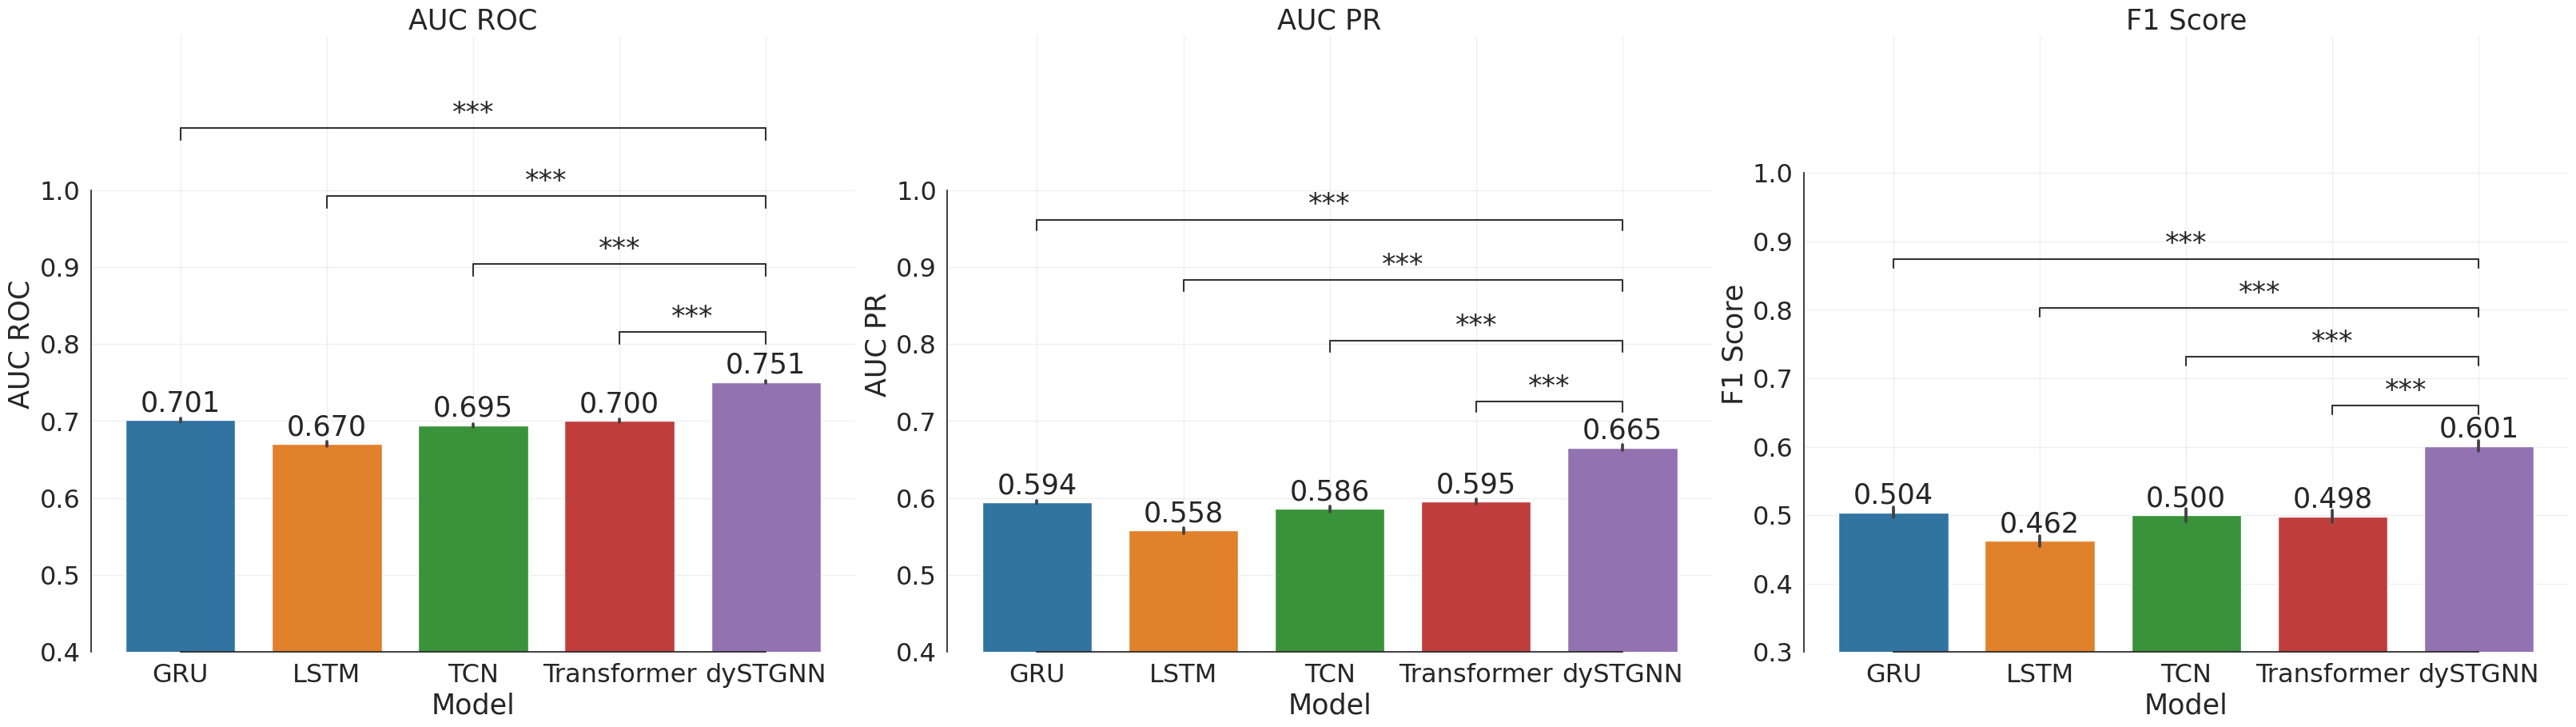

In [64]:
sns.set(font_scale=2.1, style='white')
fig, ax = plt.subplots(1, 3, figsize=(40, 10), gridspec_kw={'width_ratios': [1, 1, 1],
                                                          # 'height_ratios': [3, 3],
                                                          'wspace': 0.12,
                                                          # 'hspace': 0.4
                                                         }, sharey=False)

b1 = sns.barplot(ax=ax[0], **hue_plot_params_aucroc,errorbar="sd", width=0.75)
annotator = Annotator(ax[0], pairs, **hue_plot_params_aucroc, verbose=False)
annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[0].grid(alpha=0.3)
ax[0].set_ylim(0.4,1.2)
ax[0].set_title('AUC ROC')
values = [23, 45, 56, 78]
# Adding value labels on top of each bar
# Add value labels on top of each bar
for bar in b1.patches:
    b1.annotate(format(bar.get_height(), '.3f'),  # Format the label
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Position
                ha = 'center', va = 'center',  # Alignments
                xytext = (0, 15),  # Distance from the top of the bar
                textcoords = 'offset points')
# Get current y-ticks, filter out 1.1, and set them back
# Get current y-ticks from the axes, filter out 1.1, and set them back to the axes
yticks = ax[0].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[0].set_yticks(yticks)

b2= sns.barplot(ax=ax[1], **hue_plot_params_aucpr,errorbar="sd", width=0.75)
annotator = Annotator(ax[1], pairs, **hue_plot_params_aucpr, verbose=False)
annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[1].grid(alpha=0.3)
ax[1].set_ylim(0.4,1.2)
ax[1].set_title('AUC PR')
for bar in b2.patches:
    b2.annotate(format(bar.get_height(), '.3f'),  # Format the label
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Position
                ha = 'center', va = 'center',  # Alignments
                xytext = (0, 15),  # Distance from the top of the bar
                textcoords = 'offset points')
yticks = ax[1].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[1].set_yticks(yticks)

b3= sns.barplot(ax=ax[2], **hue_plot_params_f1, errorbar="sd", width=0.75)
annotator = Annotator(ax[2], pairs, **hue_plot_params_f1, verbose=False)
annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[2].grid(alpha=0.3)
ax[2].set_ylim(0.3,1.2)
ax[2].set_title('F1 Score')
for bar in b3.patches:
    b3.annotate(format(bar.get_height(), '.3f'),  # Format the label
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Position
                ha = 'center', va = 'center',  # Alignments
                xytext = (0, 15),  # Distance from the top of the bar
                textcoords = 'offset points')
yticks = ax[2].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[2].set_yticks(yticks)

sns.despine(trim=True)
# sns.despine(left=True)
plt.savefig('images/Fig02.png', dpi=600, bbox_inches='tight')
# plt.show()

# plot data resolution comparison

In [65]:
model = (['GRU']*10 + ['LSTM']*10 + ['TCN']*10 + ['Transformer']*10 + ['dySTGNN']*10) * 3

In [66]:
res = ['5']*50 + ['15']*50 + ['45']*50

In [67]:
data_roc =     [0.7000,0.7004,0.7010,0.7004,0.7025,0.7017,0.7003,0.6979,0.7074,0.7007,
                0.6708,0.6667,0.6787,0.6696,0.6677,0.6686,0.6704,0.6707,0.6699,0.6708,
                0.6909,0.6947,0.6941,0.6940,0.6962,0.6980,0.6922,0.6953,0.6958,0.6956,
                0.6957,0.7018,0.7000,0.7033,0.7007,0.7018,0.6992,0.6978,0.7019,0.7021,
                0.7495,0.7499,0.7517,0.7521,0.7505,0.7517,0.7499,0.7525,0.7526,0.7475,
               
                0.6911,0.6989,0.6951,0.6991,0.6979,0.6961,0.6967,0.6975,0.6992,0.6959,
                0.6715,0.6713,0.6727,0.6673,0.6720,0.6733,0.6726,0.6731,0.6739,0.6738,
                0.6930,0.6921,0.6888,0.6938,0.6938,0.6911,0.6932,0.6940,0.6942,0.6900,
                0.6988,0.7016,0.7014,0.6983,0.7006,0.7011,0.6996,0.6993,0.6992,0.6977,
                0.7901,0.7871,0.7876,0.7867,0.7920,0.7831,0.7825,0.7813,0.7815,0.7806,
              
              
                0.6852,0.6930,0.6944,0.6917,0.6909,0.6916,0.6900,0.6921,0.6905,0.6874,
                0.6686,0.6710,0.6706,0.6687,0.6712,0.6702,0.6679,0.6706,0.6718,0.6720,
                0.6898,0.6862,0.6800,0.6850,0.6884,0.6874,0.6859,0.6884,0.6881,0.6866,
                0.6906,0.6978,0.6941,0.6969,0.6948,0.6962,0.6967,0.6995,0.6910,0.6951,
                0.7811,0.7815,0.7855,0.7865,0.7833,0.7822,0.7782,0.7853,0.7805,0.7826]

data_pr =   [0.5951,0.5920,0.5936,0.5920,0.5979,0.5948,0.5947,0.5916,0.5967,0.5940,
                0.5591,0.5541,0.5660,0.5565,0.5554,0.5546,0.5551,0.5591,0.5582,0.5596,
                0.5794,0.5854,0.5850,0.5869,0.5884,0.5916,0.5804,0.5897,0.5879,0.5839,
                0.5888,0.5975,0.5931,0.5983,0.5959,0.5981,0.5946,0.5925,0.5976,0.5967,
                0.6645,0.6639,0.6667,0.6670,0.6675,0.6715,0.6597,0.6687,0.6663,0.6590,
               
                0.5815,0.5911,0.5867,0.5915,0.5916,0.5893,0.5892,0.5905,0.5901,0.5870,
                0.5603,0.5579,0.5599,0.5552,0.5589,0.5585,0.5618,0.5617,0.5630,0.5632,
                0.5840,0.5822,0.5805,0.5805,0.5778,0.5813,0.5777,0.5846,0.5827,0.5828,
                0.5945,0.5936,0.5968,0.5934,0.5954,0.5972,0.5949,0.5956,0.5947,0.5935,
                0.7168,0.7115,0.7155,0.7110,0.7188,0.7059,0.7082,0.7059,0.7082,0.7028,
               
                0.5729,0.5835,0.5851,0.5825,0.5817,0.5826,0.5831,0.5811,0.5802,0.5750,
                0.5523,0.5537,0.5563,0.5527,0.5556,0.5534,0.5547,0.5556,0.5596,0.5581,
                0.5814,0.5760,0.5681,0.5744,0.5777,0.5695,0.5784,0.5790,0.5767,0.5757,
                0.5856,0.5908,0.5901,0.5941,0.5897,0.5895,0.5941,0.5962,0.5857,0.5912,
                0.6989,0.7007,0.7097,0.7068,0.7029,0.6990,0.6965,0.7111,0.7060,0.7045]


data_f1     =  [0.5132,0.4954,0.5027,0.4954,0.5129,0.5084,0.5054,0.4970,0.4994,0.5125,
                0.4625,0.4706,0.4557,0.4601,0.4555,0.4646,0.4605,0.4803,0.4561,0.4583,
                0.4989,0.5166,0.4838,0.4999,0.4880,0.5079,0.5037,0.4999,0.5050,0.4951,
                0.4996,0.4813,0.5052,0.5098,0.4904,0.4901,0.5026,0.5035,0.4953,0.5044,
                0.5994,0.5958,0.5893,0.6111,0.5900,0.6041,0.6037,0.6080,0.6102,0.5993,
                
                0.5114,0.5070,0.5014,0.4967,0.5201,0.5005,0.4969,0.4991,0.5160,0.4934,
                0.4847,0.4867,0.4806,0.4796,0.4839,0.4711,0.4943,0.4676,0.4644,0.4865,
                0.5089,0.5064,0.5051,0.5128,0.5073,0.5156,0.4908,0.5029,0.4947,0.4951,
                0.5154,0.5134,0.5127,0.4956,0.4959,0.5064,0.5109,0.4968,0.4975,0.4934,
                0.6517,0.6484,0.6484,0.6476,0.6482,0.6448,0.6384,0.6447,0.6388,0.6435,
                
                0.4868,0.4905,0.4813,0.4986,0.5073,0.4938,0.4954,0.5081,0.4985,0.4912,
                0.4762,0.4994,0.5019,0.4872,0.4916,0.4836,0.4915,0.4768,0.4976,0.5020,
                0.5015,0.4954,0.4972,0.5065,0.4865,0.4812,0.5014,0.4976,0.4849,0.4947,
                0.4907,0.5079,0.4963,0.5026,0.4877,0.4939,0.5015,0.4958,0.5056,0.4943,
                0.6356,0.6399,0.6436,0.6437,0.6403,0.6400,0.6302,0.6379,0.6416,0.6369]

In [68]:
df_roc = pd.DataFrame({'Model': model, 'AUC ROC': data_roc, 'Data Resolution (min)': res})
df_pr  = pd.DataFrame({'Model': model, 'AUC PR': data_pr, 'Data Resolution (min)': res})
df_f1  = pd.DataFrame({'Model': model, 'F1 Score': data_f1, 'Data Resolution (min)': res})

In [69]:
my_pal = {"GRU": cmap.colors[0], "LSTM": cmap.colors[1],"TCN": cmap.colors[2],"Transformer": cmap.colors[3],"dySTGNN": cmap.colors[4]}

hue_plot_params_aucroc = {'data': df_roc,'x': 'Data Resolution (min)','y': 'AUC ROC',"hue": "Model","palette": my_pal}
hue_plot_params_aucpr  = {'data': df_pr,'x': 'Data Resolution (min)','y': 'AUC PR',"hue": "Model","palette": my_pal}
hue_plot_params_f1     = {'data': df_f1,'x': 'Data Resolution (min)','y': 'F1 Score',"hue": "Model","palette": my_pal}

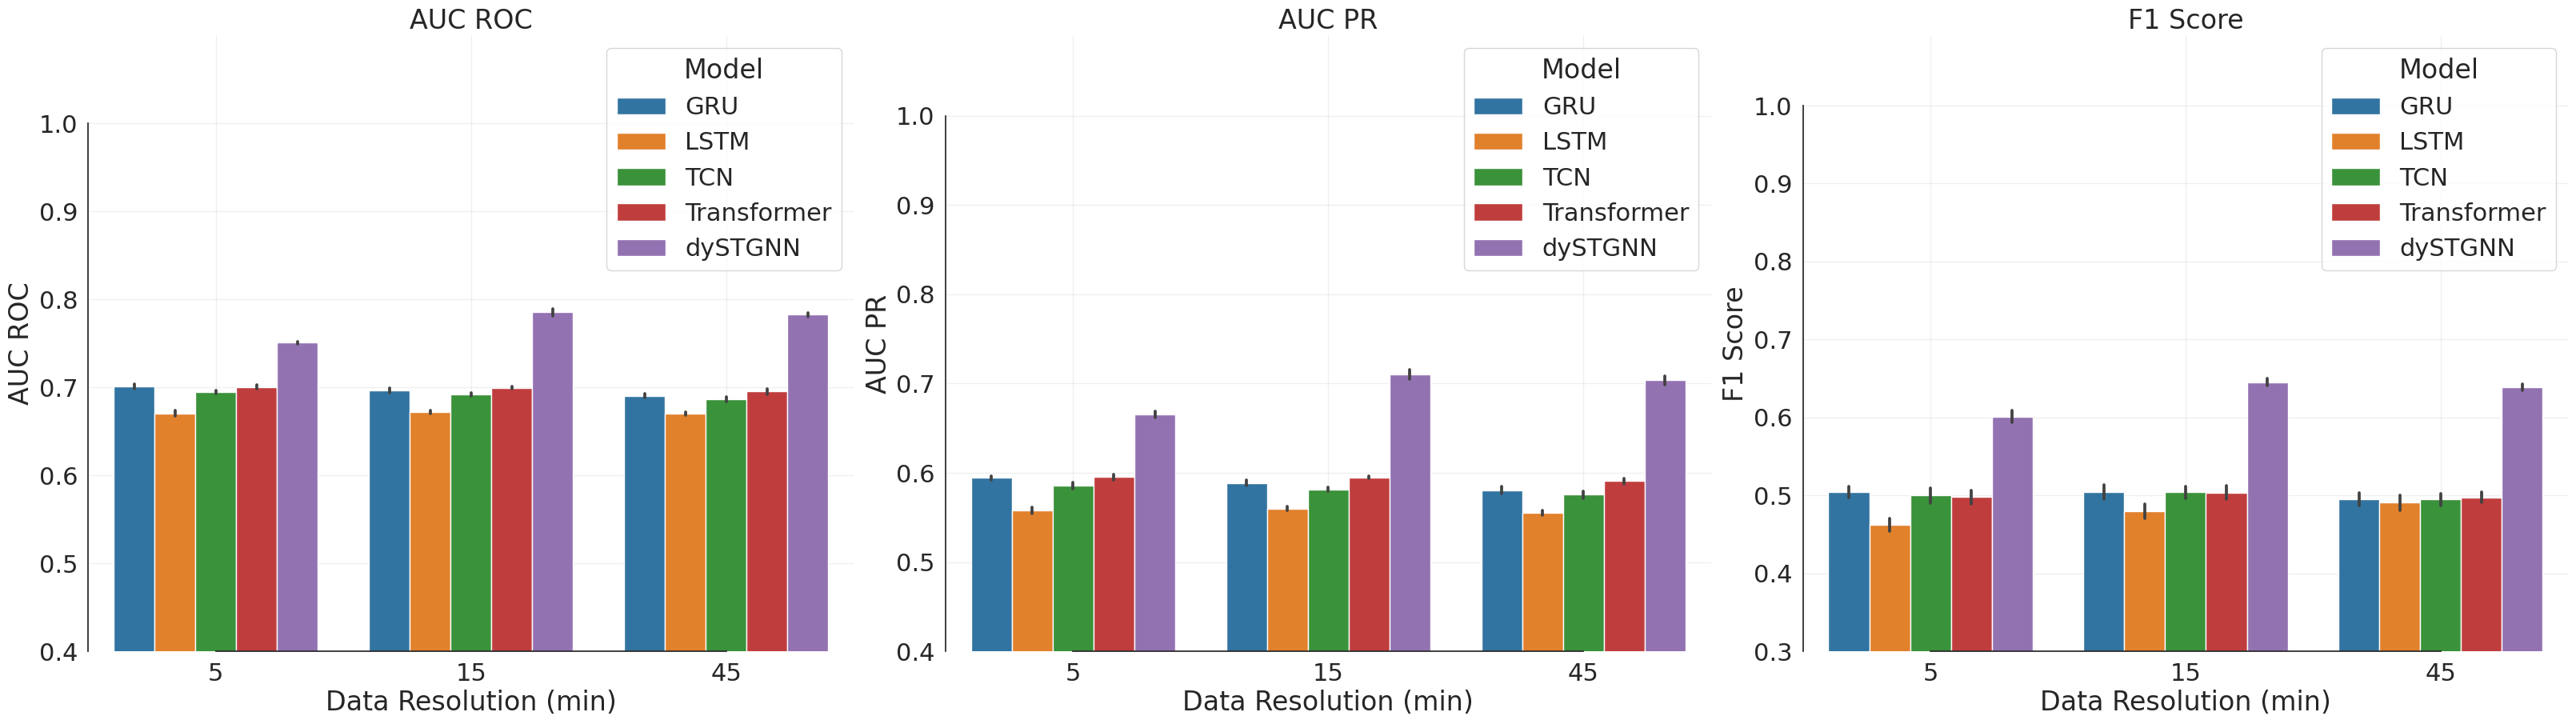

In [71]:
sns.set(font_scale=2, style='white')
fig, ax = plt.subplots(1, 3, figsize=(40, 10), gridspec_kw={'width_ratios': [1, 1, 1],
                                                          # 'height_ratios': [3, 3],
                                                          'wspace': 0.12,
                                                          # 'hspace': 0.4
                                                         }, sharey=False)

b1 = sns.barplot(ax=ax[0], **hue_plot_params_aucroc, errorbar="sd", width=0.8)
# annotator = Annotator(ax[0], pairs, **hue_plot_params_aucroc, verbose=False)
# annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[0].grid(alpha=0.3)
ax[0].set_ylim(0.4,1.1)
# Get current y-ticks, filter out 1.1, and set them back
# Get current y-ticks from the axes, filter out 1.1, and set them back to the axes
yticks = ax[0].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[0].set_yticks(yticks)
ax[0].set_title('AUC ROC')
# Get current y-ticks, filter out 1.1, and set them back
# Get current y-ticks from the axes, filter out 1.1, and set them back to the axes
yticks = ax[0].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[0].set_yticks(yticks)

b2= sns.barplot(ax=ax[1], **hue_plot_params_aucpr,errorbar="sd", width=0.8)
# annotator = Annotator(ax[1], pairs, **hue_plot_params_aucpr, verbose=False)
# annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[1].grid(alpha=0.3)
ax[1].set_ylim(0.4,1.09)
ax[1].set_title('AUC PR')
# Get current y-ticks, filter out 1.1, and set them back
# Get current y-ticks from the axes, filter out 1.1, and set them back to the axes
yticks = ax[1].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[1].set_yticks(yticks)


b3= sns.barplot(ax=ax[2], **hue_plot_params_f1,errorbar="sd", width=0.8)
# annotator = Annotator(ax[2], pairs, **hue_plot_params_f1, verbose=False)
# annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[2].grid(alpha=0.3)
ax[2].set_ylim(0.3,1.09)
ax[2].set_title('F1 Score')
# Get current y-ticks, filter out 1.1, and set them back
# Get current y-ticks from the axes, filter out 1.1, and set them back to the axes
yticks = ax[2].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[2].set_yticks(yticks)


sns.despine(trim=True, fig=fig)
# sns.despine(left=True)
plt.savefig('images/Fig03a.png', dpi=600, bbox_inches='tight')
# plt.show()

# data length analysis for long range dependency

In [72]:
model = (['GRU']*10 + ['LSTM']*10 + ['TCN']*10 + ['Transformer']*10 + ['dySTGNN']*10) * 4

In [73]:
dlen = ['1 Day']*50 + ['3 Days']*50 + ['5 Days']*50 + ['7 Days']*50

In [74]:
data_roc = [0.6920,0.6959,0.6920,0.6958,0.6945,0.6931,0.6944,0.6885,0.6978,0.6951,
            0.6786,0.6785,0.6792,0.6770,0.6754,0.6784,0.6843,0.6811,0.6773,0.6818,
            0.6951,0.6934,0.6971,0.6955,0.6971,0.6916,0.6974,0.6988,0.6965,0.7034,
            0.7041,0.6999,0.7046,0.7008,0.7030,0.7016,0.7033,0.6998,0.7012,0.7023,
            0.8596,0.8625,0.8565,0.8584,0.8633,0.8597,0.8636,0.8602,0.8615,0.8590,
           
            0.6991,0.6934,0.6914,0.6908,0.6960,0.6924,0.6962,0.6955,0.7005,0.6929,
            0.6705,0.6719,0.6650,0.6692,0.6731,0.6675,0.6755,0.6717,0.6738,0.6668,
            0.6902,0.6917,0.6901,0.6900,0.6938,0.6964,0.6946,0.6992,0.6895,0.6875,
            0.7028,0.7003,0.7003,0.6989,0.7041,0.7014,0.7006,0.7039,0.7009,0.7047,
            0.8112,0.8143,0.8137,0.8168,0.8147,0.8142,0.8149,0.8153,0.8156,0.8144,
           
            0.7008,0.6993,0.7026,0.7026,0.7033,0.6972,0.7018,0.7008,0.7029,0.6996,
            0.6684,0.6715,0.6711,0.6678,0.6701,0.6718,0.6715,0.6716,0.6730,0.6713,
            0.6971,0.6942,0.6955,0.6949,0.6987,0.6944,0.6951,0.6991,0.6992,0.6932,
            0.7020,0.6999,0.7019,0.7011,0.7013,0.6979,0.7016,0.7013,0.6996,0.6998,
            0.7743,0.7720,0.7728,0.7731,0.7776,0.7722,0.7691,0.7713,0.7749,0.7678,
            
            0.7000,0.7004,0.7010,0.7004,0.7025,0.7017,0.7003,0.6979,0.7074,0.7007,
            0.6708,0.6667,0.6787,0.6696,0.6677,0.6686,0.6704,0.6707,0.6699,0.6708,
            0.6909,0.6947,0.6941,0.6940,0.6962,0.6980,0.6922,0.6953,0.6958,0.6956,
            0.6957,0.7018,0.7000,0.7033,0.7007,0.7018,0.6992,0.6978,0.7019,0.7021,
            0.7495,0.7499,0.7517,0.7521,0.7505,0.7517,0.7499,0.7525,0.7526,0.7475]

data_pr  = [0.6043,0.6095,0.6043,0.6090,0.6093,0.6084,0.6083,0.6021,0.6116,0.6088,
            0.5900,0.5920,0.5918,0.5898,0.5884,0.5902,0.5954,0.5921,0.5865,0.5946,
            0.6058,0.6064,0.6095,0.6057,0.6087,0.6045,0.6055,0.6087,0.6073,0.6162,
            0.6191,0.6150,0.6229,0.6182,0.6215,0.6185,0.6188,0.6179,0.6190,0.6204,
            0.8172,0.8211,0.8161,0.8182,0.8217,0.8203,0.8250,0.8201,0.8189,0.8162,
           
            0.5955,0.5893,0.5888,0.5943,0.5892,0.5822,0.5967,0.5922,0.6012,0.5889,
            0.5667,0.5658,0.5664,0.5549,0.5736,0.5480,0.5747,0.5538,0.5713,0.5539,
            0.5866,0.5869,0.5835,0.5907,0.5905,0.5896,0.6058,0.5971,0.5868,0.5867,
            0.6019,0.5987,0.5993,0.5974,0.5992,0.6023,0.6007,0.6048,0.6013,0.6023,
            0.7460,0.7485,0.7551,0.7514,0.7510,0.7494,0.7481,0.7479,0.7548,0.7542,
            
            0.5959,0.5928,0.6005,0.5974,0.5993,0.5937,0.5990,0.5975,0.5970,0.5932,
            0.5578,0.5602,0.5605,0.5577,0.5582,0.5590,0.5631,0.5621,0.5636,0.5633,
            0.5905,0.5878,0.5821,0.5870,0.5924,0.5804,0.5838,0.5838,0.5895,0.5778,
            0.5996,0.5940,0.6007,0.5989,0.6006,0.5947,0.5968,0.5973,0.5937,0.5976,
            0.6962,0.6923,0.7008,0.6962,0.6998,0.6961,0.6860,0.6909,0.6970,0.6858,
            
            0.5951,0.5920,0.5936,0.5920,0.5979,0.5948,0.5947,0.5916,0.5967,0.5940,
            0.5591,0.5541,0.5660,0.5565,0.5554,0.5546,0.5551,0.5591,0.5582,0.5596,
            0.5794,0.5854,0.5850,0.5869,0.5884,0.5916,0.5804,0.5897,0.5879,0.5839,
            0.5888,0.5975,0.5931,0.5983,0.5959,0.5981,0.5946,0.5925,0.5976,0.5967,
            0.6645,0.6639,0.6667,0.6670,0.6675,0.6715,0.6597,0.6687,0.6663,0.6590]

data_f1  = [0.5072,0.5132,0.5072,0.5190,0.5069,0.5103,0.5077,0.4963,0.4929,0.4633,
            0.4903,0.4971,0.4710,0.4924,0.4786,0.5062,0.5106,0.4991,0.4712,0.4898,
            0.5193,0.5454,0.4991,0.5023,0.5095,0.5045,0.4688,0.4708,0.4960,0.5071,
            0.4897,0.4618,0.5010,0.5211,0.5134,0.5297,0.5022,0.5262,0.5117,0.5036,
            0.7323,0.7371,0.7306,0.7303,0.7385,0.7351,0.7381,0.7361,0.7326,0.7368,
           
            0.4990,0.4929,0.4947,0.4894,0.4962,0.4930,0.4977,0.4916,0.4996,0.4869,
            0.4764,0.4821,0.4770,0.4726,0.4779,0.4726,0.4771,0.4818,0.4807,0.4745,
            0.4972,0.4942,0.4941,0.4947,0.4981,0.4996,0.5005,0.5086,0.4920,0.4921,
            0.4902,0.5179,0.4999,0.4976,0.4971,0.5058,0.4944,0.5045,0.5192,0.5005,
            0.6692,0.6750,0.6827,0.6744,0.6693,0.6668,0.6763,0.6665,0.6728,0.6740,
           
            0.4936,0.4990,0.4994,0.5167,0.5040,0.4936,0.5004,0.5188,0.5143,0.5000,
            0.4734,0.4651,0.4647,0.4793,0.4695,0.4622,0.4797,0.4568,0.4630,0.4785,
            0.5209,0.5257,0.5143,0.5054,0.5100,0.5122,0.5094,0.5138,0.5167,0.5024,
            0.4931,0.5163,0.5093,0.4927,0.5028,0.4980,0.4983,0.5078,0.4932,0.4979,
            0.6400,0.6339,0.6379,0.6318,0.6420,0.6385,0.6301,0.6351,0.6381,0.6261,
            
            0.5132,0.4954,0.5027,0.4954,0.5129,0.5084,0.5054,0.4970,0.4994,0.5125,
            0.4625,0.4706,0.4557,0.4601,0.4555,0.4646,0.4605,0.4803,0.4561,0.4583,
            0.4789,0.5166,0.4838,0.4999,0.4880,0.5079,0.5037,0.4999,0.5050,0.4951,
            0.4996,0.4813,0.5052,0.5098,0.4904,0.4901,0.5026,0.5035,0.4953,0.5044,
            0.5994,0.5958,0.5893,0.6111,0.5900,0.6041,0.6037,0.6080,0.6102,0.5993]

In [75]:
df_roc = pd.DataFrame({'Model': model, 'AUC ROC': data_roc, 'Time Series Length (Days/Timesteps)': dlen})
df_pr  = pd.DataFrame({'Model': model, 'AUC PR': data_pr,   'Time Series Length (Days/Timesteps)': dlen})
df_f1  = pd.DataFrame({'Model': model, 'F1 Score': data_f1, 'Time Series Length (Days/Timesteps)': dlen})

In [76]:
my_pal = {"GRU": cmap.colors[0], "LSTM": cmap.colors[1],"TCN": cmap.colors[2],"Transformer": cmap.colors[3],"dySTGNN": cmap.colors[4]}

hue_plot_params_aucroc = {'data': df_roc,'x': 'Time Series Length (Days/Timesteps)','y': 'AUC ROC',"hue": "Model","palette": my_pal}
hue_plot_params_aucpr  = {'data': df_pr,'x':  'Time Series Length (Days/Timesteps)','y': 'AUC PR',"hue": "Model","palette": my_pal}
hue_plot_params_f1     = {'data': df_f1,'x':  'Time Series Length (Days/Timesteps)','y': 'F1 Score',"hue": "Model","palette": my_pal}

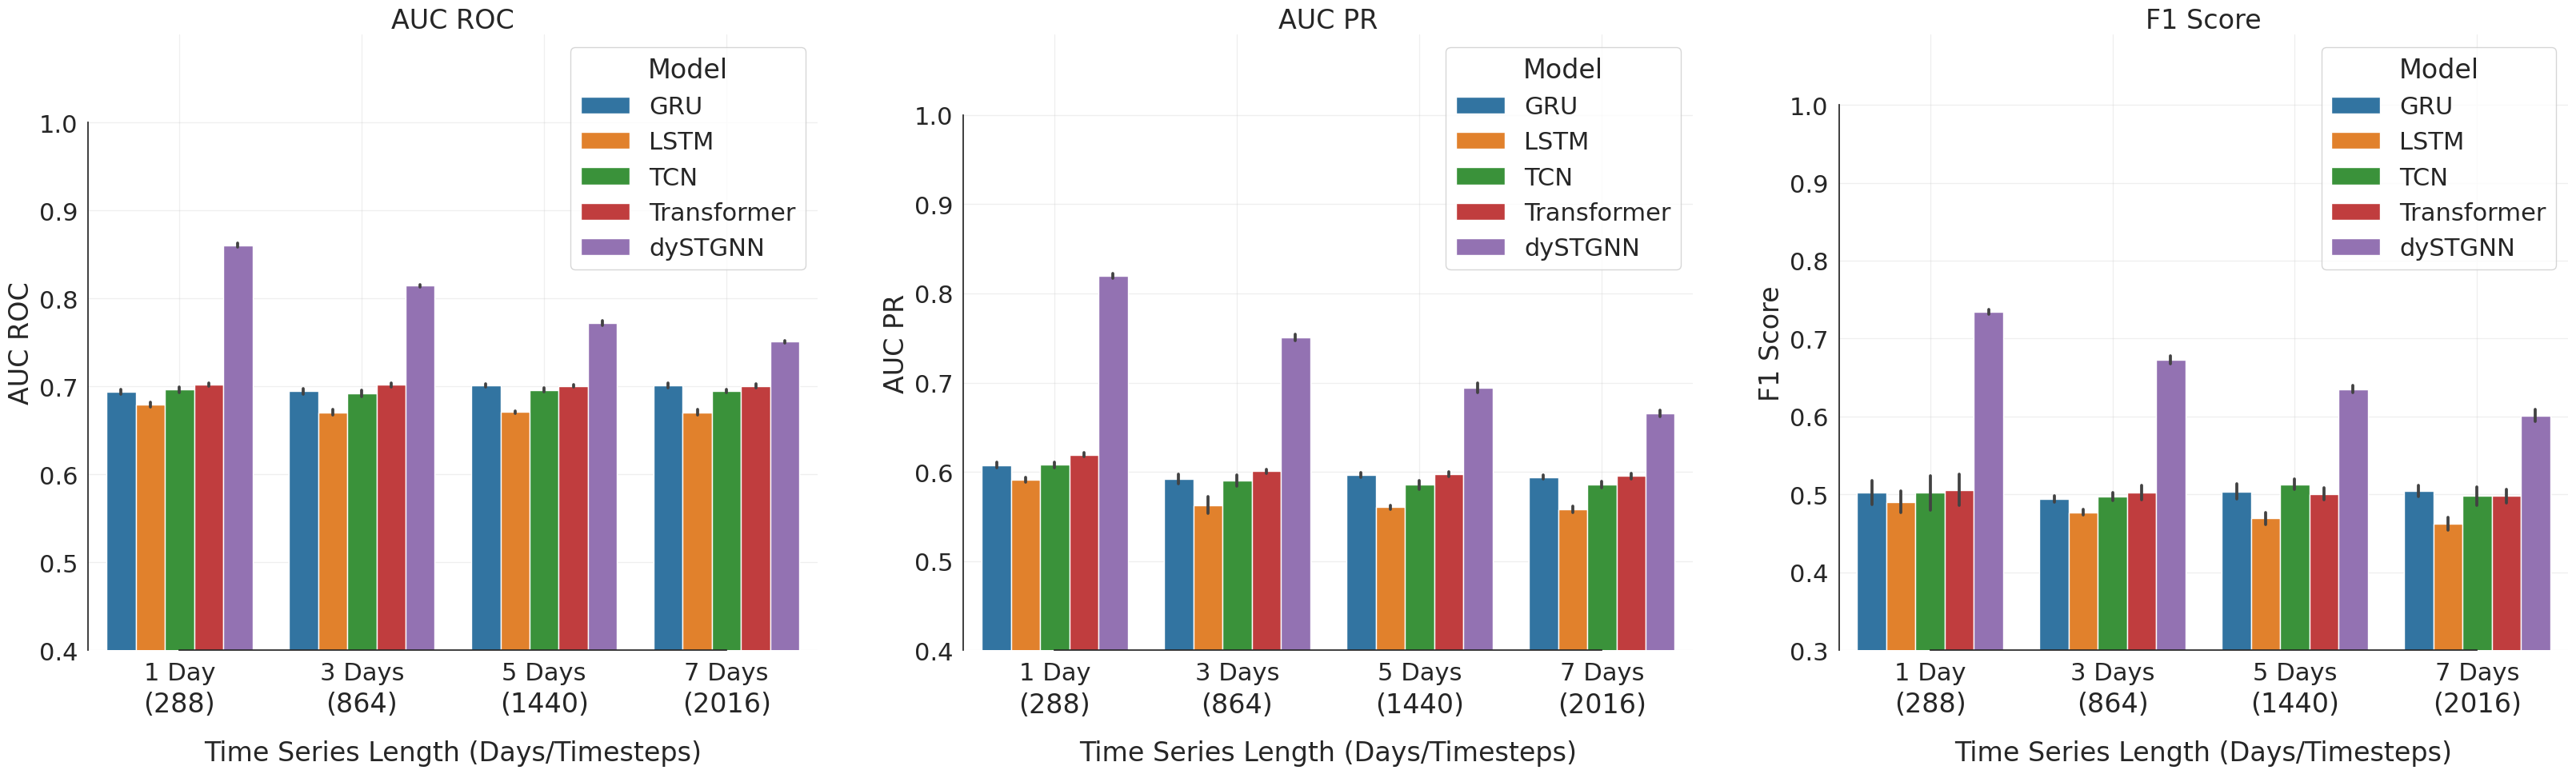

In [78]:
sns.set(font_scale=2, style='white')
fig, ax = plt.subplots(1, 3, figsize=(40, 10), gridspec_kw={'width_ratios': [1, 1, 1],
                                                          # 'height_ratios': [3, 3],
                                                          'wspace': 0.2,
                                                          # 'hspace': 0.4
                                                         }, sharey=False)

b1 = sns.barplot(ax=ax[0], **hue_plot_params_aucroc, errorbar="sd", width=0.8)
# annotator = Annotator(ax[0], pairs, **hue_plot_params_aucroc, verbose=False)
# annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[0].grid(alpha=0.3)
ax[0].set_ylim(0.4,1.1)
# Get current y-ticks, filter out 1.1, and set them back
# Get current y-ticks from the axes, filter out 1.1, and set them back to the axes
yticks = ax[0].get_yticks()
yticks = [ytick for ytick in yticks if ytick < 1.1]
ax[0].set_yticks(yticks)
ax[0].set_title('AUC ROC')
ax[0].set_xlabel('Time Series Length (Days/Timesteps)', labelpad=50)
labels = ['(288)','(864)','(1440)','(2016)']
for tick, label in zip(ax[0].get_xticks(), labels):
    ax[0].text(tick, ax[0].get_ylim()[0] - (ax[0].get_ylim()[1] - ax[0].get_ylim()[0]) * 0.1, label, ha='center')


b2= sns.barplot(ax=ax[1], **hue_plot_params_aucpr,errorbar="sd", width=0.8)
# annotator = Annotator(ax[1], pairs, **hue_plot_params_aucpr, verbose=False)
# annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[1].grid(alpha=0.3)
ax[1].set_ylim(0.4,1.09)
ax[1].set_xlabel('Time Series Length (Days/Timesteps)', labelpad=50)
for tick, label in zip(ax[1].get_xticks(), labels):
    ax[1].text(tick, ax[1].get_ylim()[0] - (ax[0].get_ylim()[1] - ax[1].get_ylim()[0]) * 0.1, label, ha='center')
ax[1].set_title('AUC PR')

b3= sns.barplot(ax=ax[2], **hue_plot_params_f1,errorbar="sd", width=0.8)
# annotator = Annotator(ax[2], pairs, **hue_plot_params_f1, verbose=False)
# annotator.configure(test="Mann-Whitney", comparisons_correction="HB",correction_format="replace",loc='inside').apply_and_annotate()
ax[2].grid(alpha=0.3)
ax[2].set_ylim(0.3,1.09)

ax[2].set_xlabel('Time Series Length (Days/Timesteps)', labelpad=50)
for tick, label in zip(ax[2].get_xticks(), labels):
    ax[2].text(tick, ax[2].get_ylim()[0] - (ax[2].get_ylim()[1] - ax[2].get_ylim()[0]) * 0.1, label, ha='center')
ax[2].set_title('F1 Score')


sns.despine(trim=True, fig=fig)
# sns.despine(left=True)
plt.savefig('images/Fig03b.png', dpi=600, bbox_inches='tight')
plt.show()